<a href="https://colab.research.google.com/github/F-ATIZA/FATIMA-ZAHRA-AKHARAZ-24010341/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("haiderrasoolqadri/heart-disease-dataset-uci")

print("Path to dataset files:", path)

100%|██████████| 12.4k/12.4k [00:00<00:00, 15.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/haiderrasoolqadri/heart-disease-dataset-uci/versions/1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

csv_file_path = None
# Search for the CSV file within the downloaded dataset path
for root, _, filenames in os.walk(path):
    for filename in filenames:
        if filename.endswith(".csv"):
            csv_file_path = os.path.join(root, filename)
            break
    if csv_file_path:
        break

if csv_file_path:
    data = pd.read_csv(csv_file_path, index_col= "id")
    print("CSV file loaded:", csv_file_path)
    display(data.head())
else:
    print("No CSV file found in the dataset directory.")

CSV file loaded: /root/.cache/kagglehub/datasets/haiderrasoolqadri/heart-disease-dataset-uci/versions/1/heart_disease_uci.csv


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
data_rows, data_cols= data.shape

print(f"Shape of the Data")
print(f"Data rows: {data_rows}")
print(f"Data columns: {data_cols}")

Shape of the Data
Data rows: 920
Data columns: 15


In [5]:
# Percentage of Null Values
null_var = data.isnull().sum()/data.shape[0] *100
null_var

,0
age,0.000000
sex,0.000000
dataset,0.000000
cp,0.000000
trestbps,6.413043
chol,3.260870
fbs,9.782609
restecg,0.217391
thalch,5.978261
exang,5.978261


1. Bibliothèques importées avec succès

2. Données chargées avec succès
   Taille du dataset : (920, 15)

3. Aperçu des données


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0



Valeurs manquantes par colonne :
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

4. Séparation X (features) et y (target)

5. Prétraitement des données
   Pipelines de nettoyage définis

6. Séparation Train / Test
   Train : 736 lignes
   Test  : 184 lignes

7. Entraînement du modèle Random Forest
   Modèle entraîné avec succès

8. Évaluation du modèle
   ✅ Accuracy : 83.70%

   Rapport de classification :
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        82
           1       0.85      0.86      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



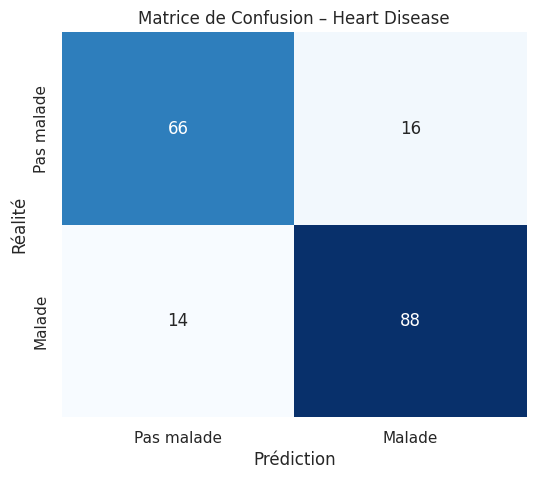


--- FIN DU SCRIPT ---


In [7]:
# ==============================================================================
# COURS DATA SCIENCE : CYCLE DE VIE COMPLET
# DATASET : HEART DISEASE UCI
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. IMPORTATION DES BIBLIOTHÈQUES
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

print("1. Bibliothèques importées avec succès\n")

# ------------------------------------------------------------------------------
# 2. CHARGEMENT DES DONNÉES
# ------------------------------------------------------------------------------
# ☢️ Adapter le chemin si besoin (Colab / Kaggle)

# Use the path determined from the kagglehub download
path = csv_file_path # Using the globally available csv_file_path
df = pd.read_csv(path, index_col="id")

print("2. Données chargées avec succès")
print(f"   Taille du dataset : {df.shape}\n")

# ------------------------------------------------------------------------------
# 3. ANALYSE RAPIDE DES DONNÉES
# ------------------------------------------------------------------------------
print("3. Aperçu des données")
display(df.head())

print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# ------------------------------------------------------------------------------
# 4. SÉPARATION FEATURES / TARGET
# ------------------------------------------------------------------------------
print("\n4. Séparation X (features) et y (target)")

X = df.drop("num", axis=1)
y = df["num"]

# Transformation en problème de classification binaire
# 0 : pas de maladie | 1 : maladie
y = (y > 0).astype(int)

# ------------------------------------------------------------------------------
# 5. PRÉPARATION DES DONNÉES (PREPROCESSING)
# ------------------------------------------------------------------------------
print("\n5. Prétraitement des données")

# Colonnes numériques et catégorielles
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

# Pipeline numérique
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# Pipeline catégoriel
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Préprocesseur global
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

print("   Pipelines de nettoyage définis\n")

# ------------------------------------------------------------------------------
# 6. TRAIN / TEST SPLIT
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("6. Séparation Train / Test")
print(f"   Train : {X_train.shape[0]} lignes")
print(f"   Test  : {X_test.shape[0]} lignes\n")

# ------------------------------------------------------------------------------
# 7. MODÉLISATION (RANDOM FOREST)
# ------------------------------------------------------------------------------
print("7. Entraînement du modèle Random Forest")

model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ))
])

model.fit(X_train, y_train)
print("   Modèle entraîné avec succès\n")

# ------------------------------------------------------------------------------
# 8. ÉVALUATION DES PERFORMANCES
# ------------------------------------------------------------------------------
print("8. Évaluation du modèle")

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"   ✅ Accuracy : {acc*100:.2f}%\n")

print("   Rapport de classification :")
print(classification_report(y_test, y_pred))

# ------------------------------------------------------------------------------
# 9. MATRICE DE CONFUSION
# ------------------------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt="d",
    cmap="Blues", cbar=False,
    xticklabels=["Pas malade", "Malade"],
    yticklabels=["Pas malade", "Malade"]
)
plt.xlabel("Prédiction")
plt.ylabel("Réalité")
plt.title("Matrice de Confusion – Heart Disease")
plt.show()

print("\n--- FIN DU SCRIPT ---")


In [8]:
obj_cols= data.select_dtypes(include= ["object"]).columns
num_cols= data.select_dtypes(include= ["float", "int"]).columns

print("-------Obj Cols-------\n")
print(f"The Following Columns Have Dtype as Object: \n{obj_cols}\n")
print(f"The Value Count of Categorical Columns: {obj_cols.value_counts().sum()}\n")


print("-------Num Cols-------\n")
print(f"The Following Columns Have Dtype as Float, Int: \n{num_cols}\n")
print(f"The Value Count of Numerical Columns: {num_cols.value_counts().sum()}\n")

-------Obj Cols-------

The Following Columns Have Dtype as Object: 
Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

The Value Count of Categorical Columns: 8

-------Num Cols-------

The Following Columns Have Dtype as Float, Int: 
Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object')

The Value Count of Numerical Columns: 7



In [9]:
from scipy.stats import skew

data[num_cols].skew().sort_values()

,0
chol,-0.613836
thalch,-0.211119
age,-0.195994
trestbps,0.213334
num,0.968880
oldpeak,1.041427
ca,1.165978


In [10]:
disease= data.num.value_counts().reset_index()

disease


,num,count
0,0,411
1,1,265
2,2,109
3,3,107
4,4,28


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

data.describe().loc[["min", "mean", "25%", "50%", "75%", "max"]].T.style.background_gradient(axis= 1)

,min,mean,25%,50%,75%,max
age,28.000000,53.510870,47.000000,54.000000,60.000000,77.000000
trestbps,0.000000,132.132404,120.000000,130.000000,140.000000,200.000000
chol,0.000000,199.130337,175.000000,223.000000,268.000000,603.000000
thalch,60.000000,137.545665,120.000000,140.000000,157.000000,202.000000
oldpeak,-2.600000,0.878788,0.000000,0.500000,1.500000,6.200000
ca,0.000000,0.676375,0.000000,0.000000,1.000000,3.000000
num,0.000000,0.995652,0.000000,1.000000,2.000000,4.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 115.0+ KB


In [14]:
# Numerical Cols

# Impute skewed (use median)
median_impute = ['chol', 'num', 'oldpeak', 'ca']
data[median_impute] = data[median_impute].fillna(data[median_impute].median())

# Impute nearly symmetric (use mean)
mean_impute = ['thalch', 'trestbps']
data[mean_impute] = data[mean_impute].fillna(data[mean_impute].mean())


# Categorical Variables

cat_cols = ['restecg', 'slope', 'thal', "fbs", "exang"]
data[cat_cols] = data[cat_cols].fillna(data[cat_cols].mode().iloc[0])


# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in data.columns if data[cname].nunique() < 10 and
                        data[cname].dtype == "object"]

# Convert Boolean to Integer
data['fbs'] = data['fbs'].astype(int)
data['exang'] = data['exang'].astype(int)

In [15]:
print(data.isnull().sum())

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [16]:
data.head()


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,,
1,63,Male,Cleveland,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0,2.3,downsloping,0.0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1,1.5,flat,3.0,normal,2
3,67,Male,Cleveland,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1,2.6,flat,2.0,reversable defect,1
4,37,Male,Cleveland,non-anginal,130.0,250.0,0,normal,187.0,0,3.5,downsloping,0.0,normal,0
5,41,Female,Cleveland,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0,1.4,upsloping,0.0,normal,0


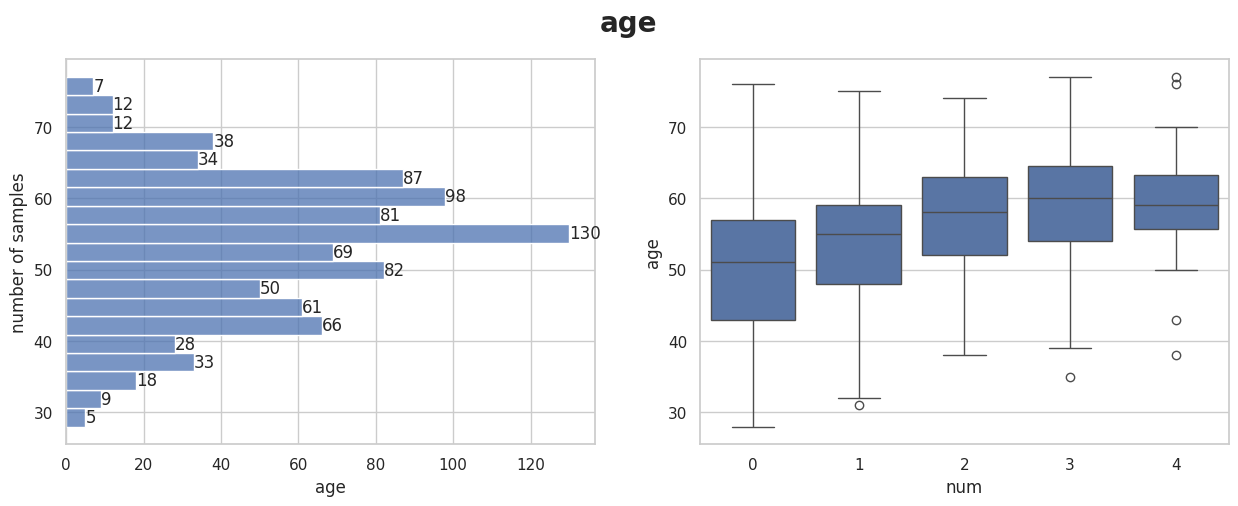

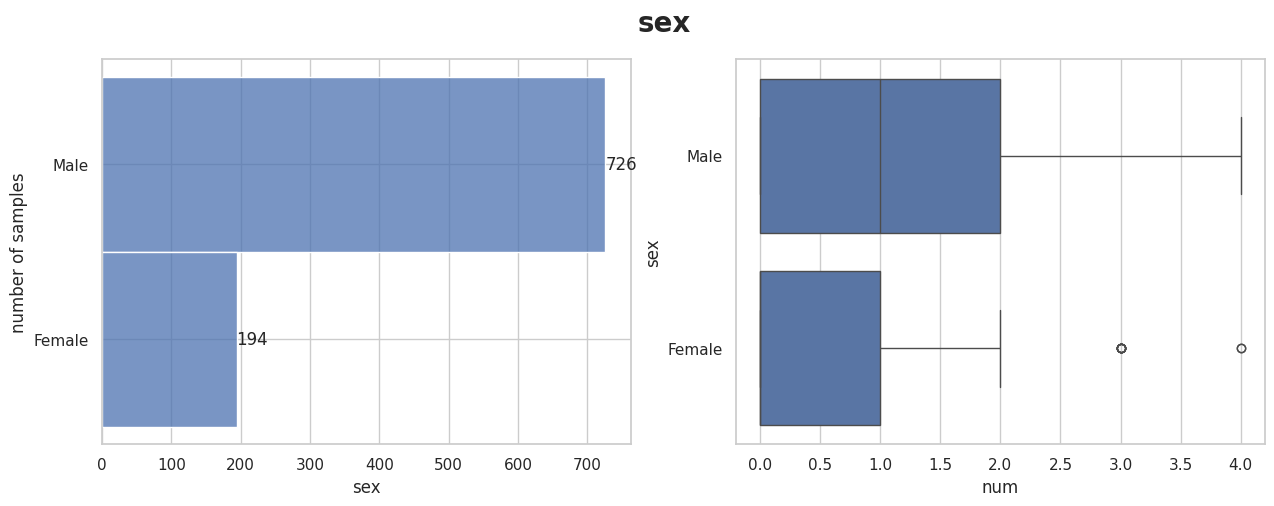

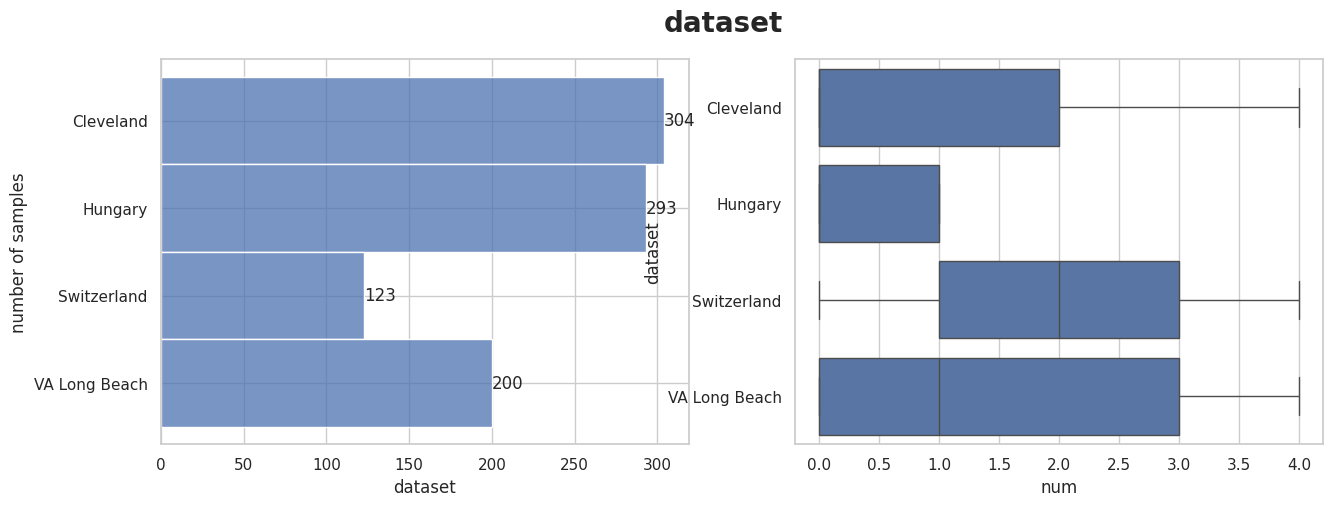

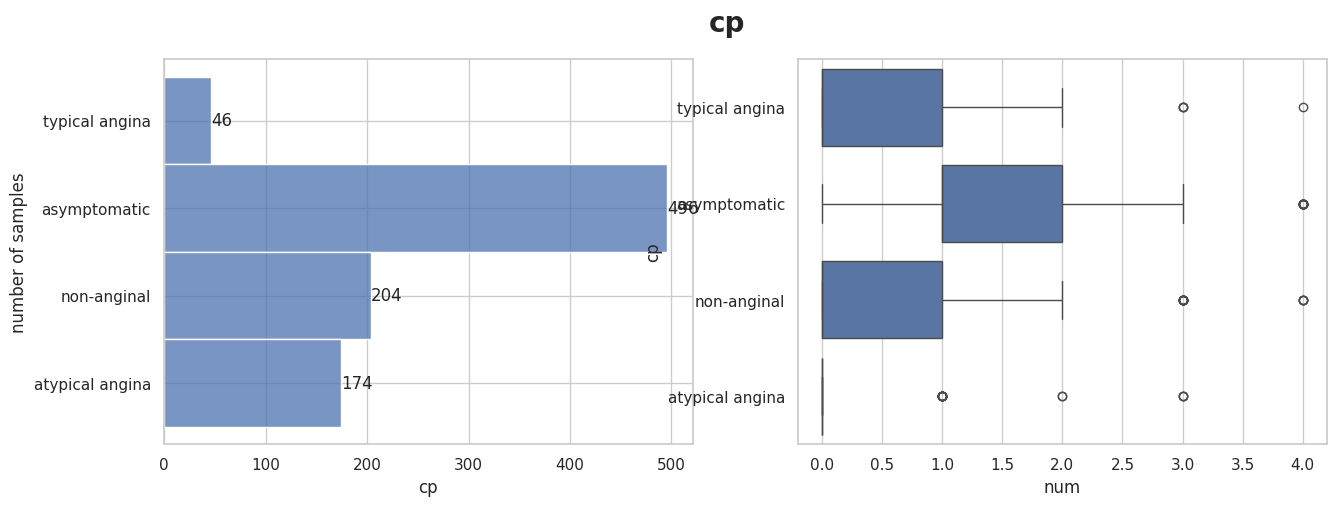

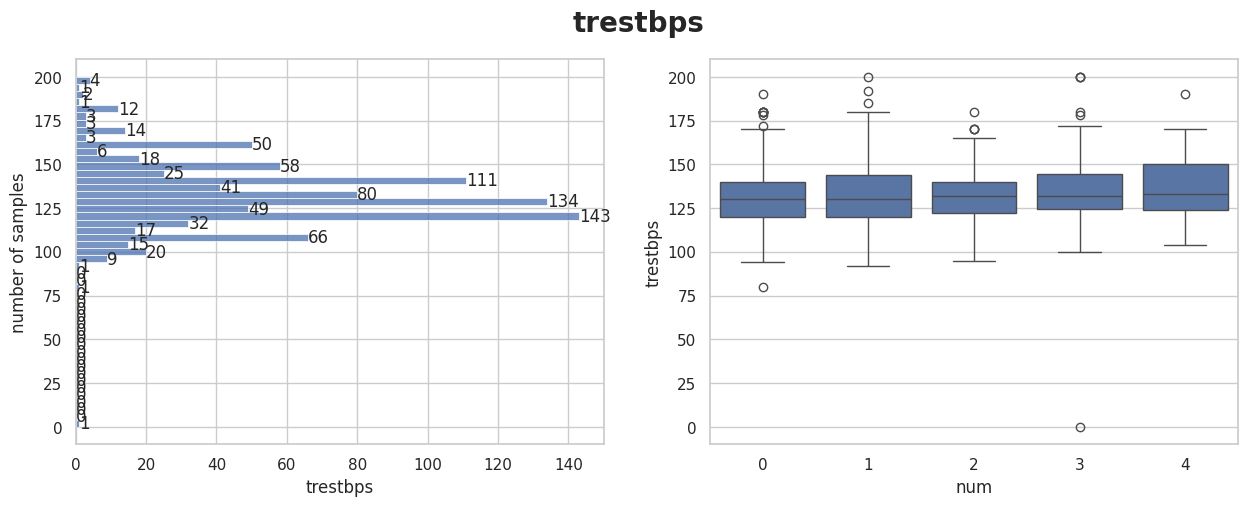

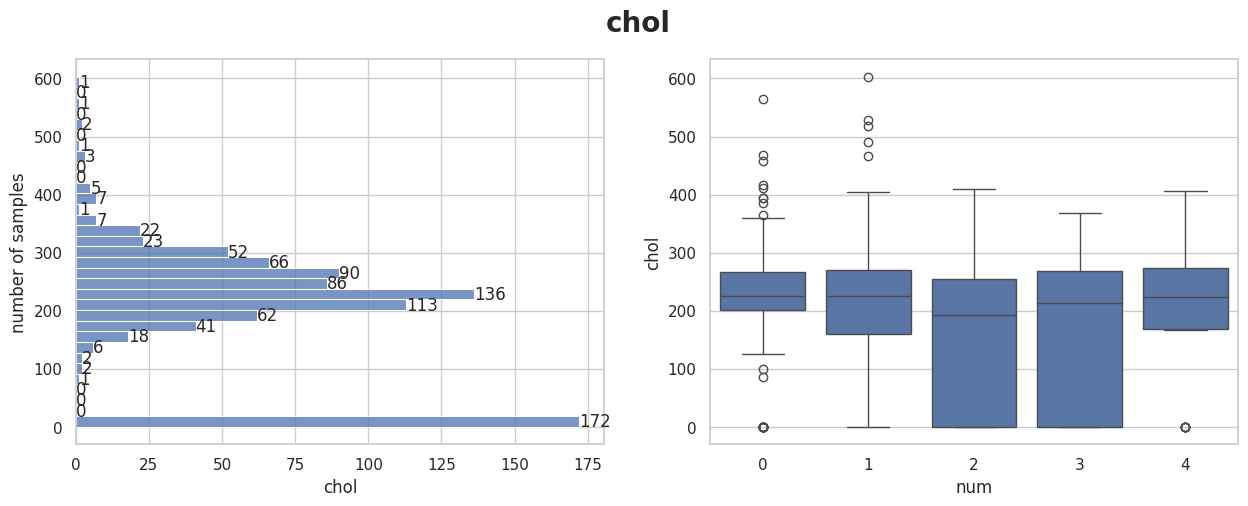

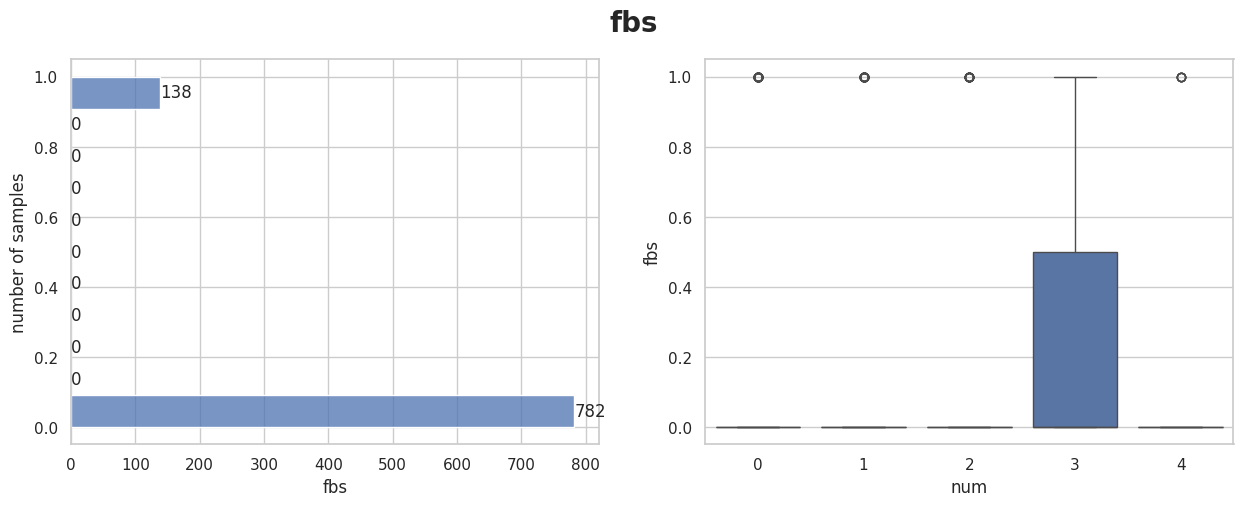

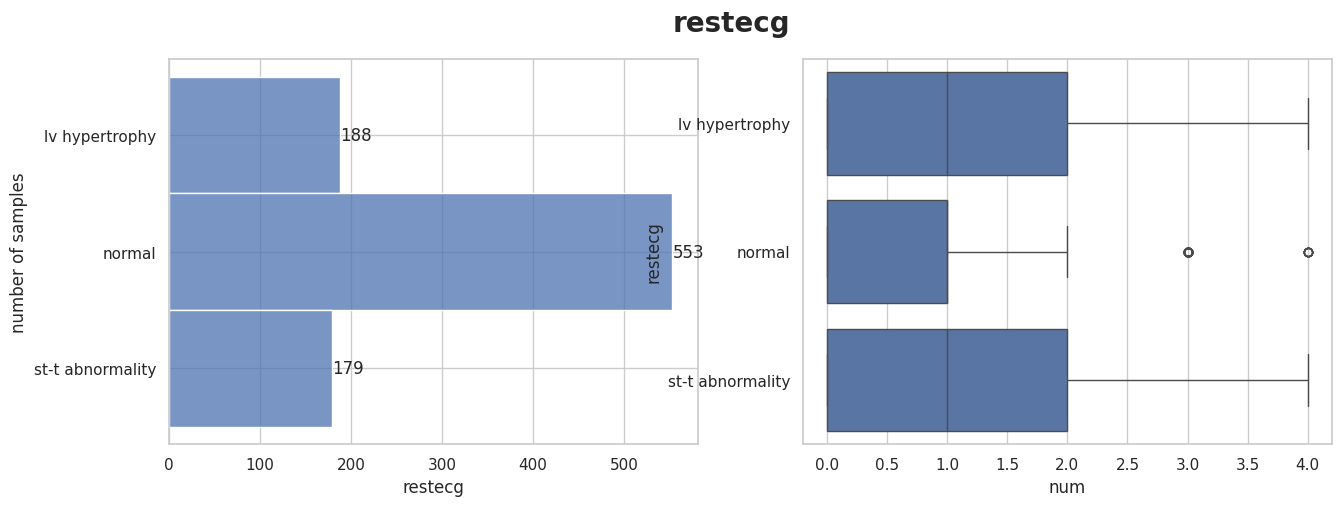

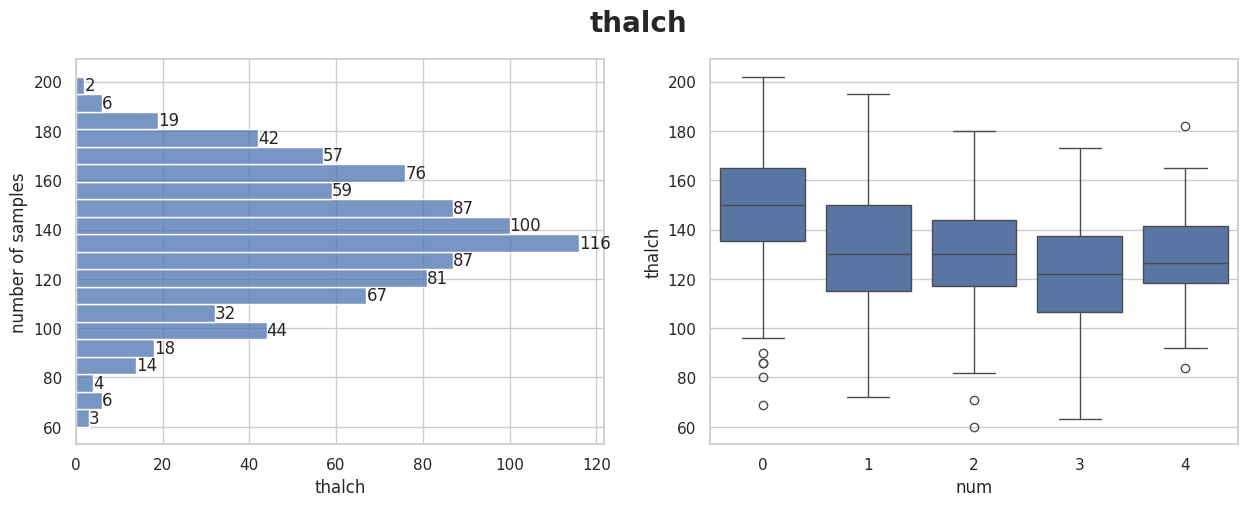

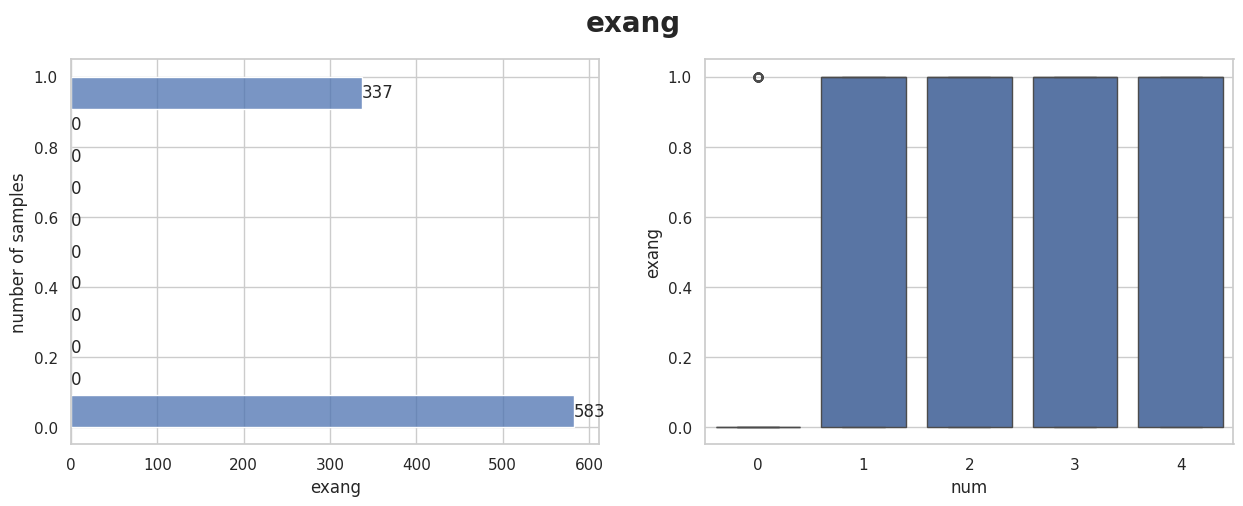

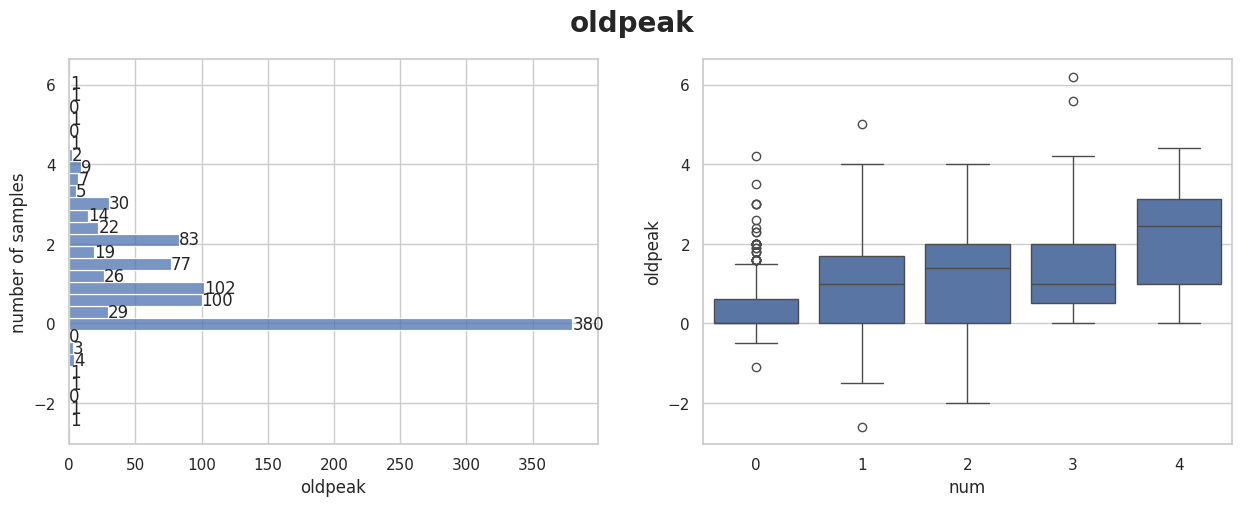

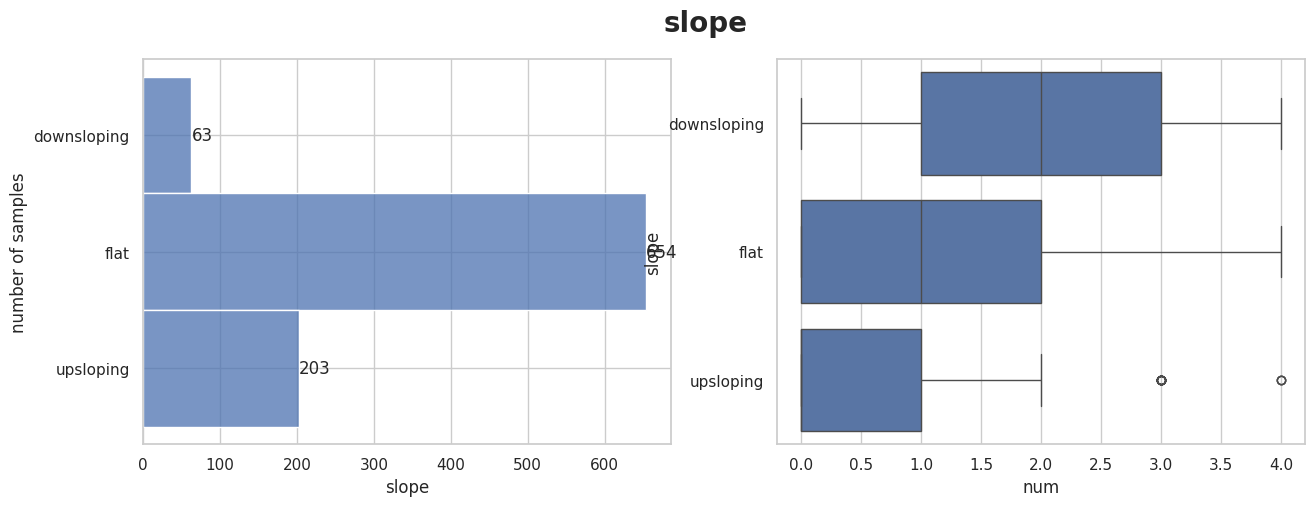

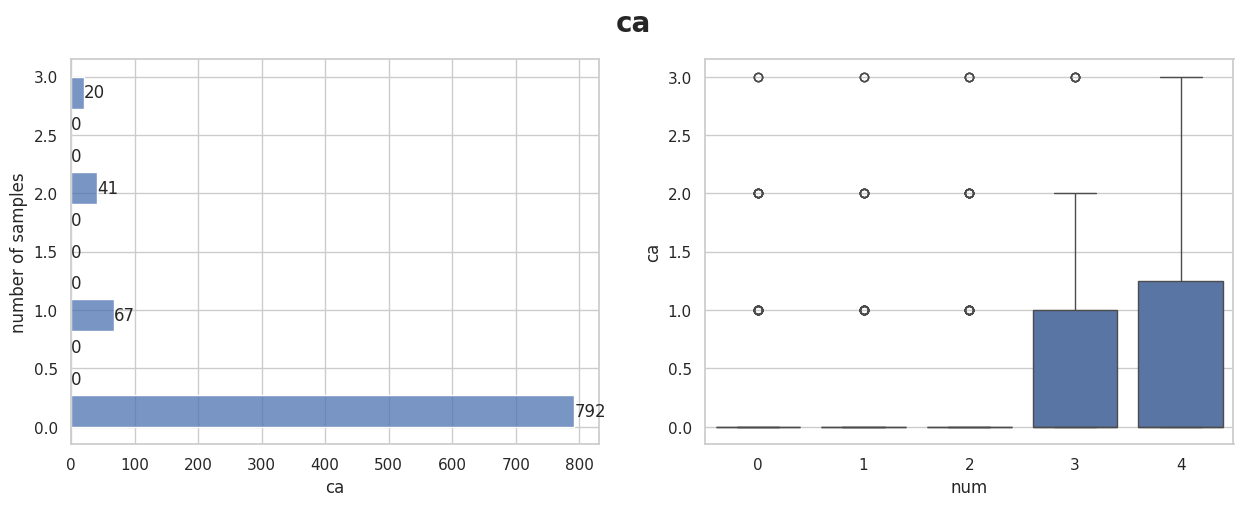

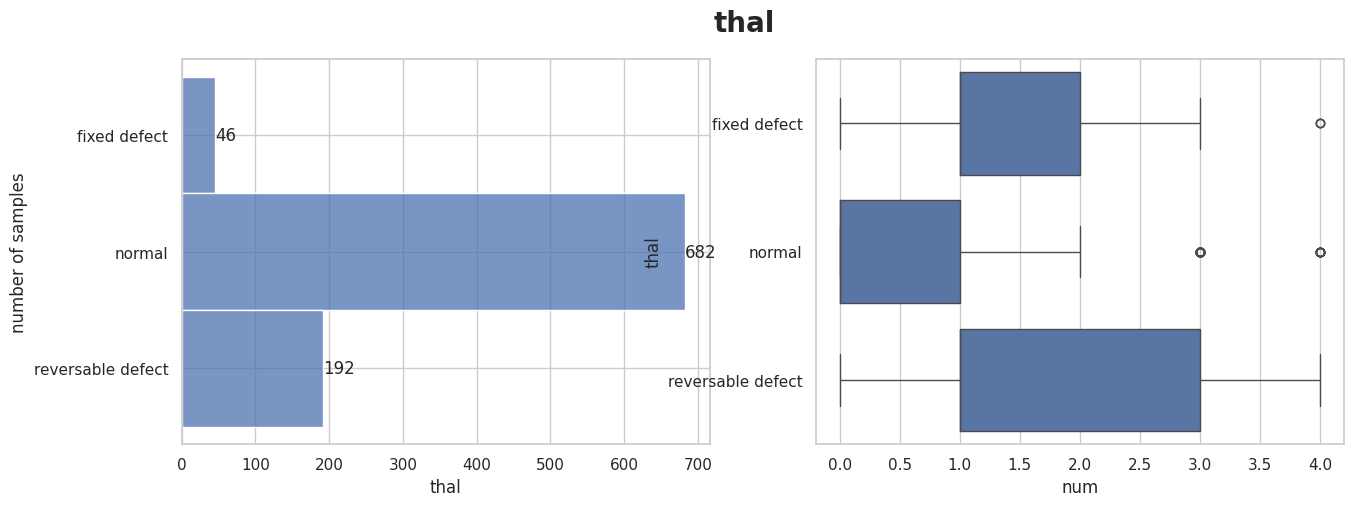

In [17]:
for col in data.columns[:-1]:
    # 1 row, 2 cols
    fig, ax = plt.subplots(1, 2, figsize= (15, 5))

    plt.suptitle(col, fontsize= 20, fontweight= "bold")

    # Left Ax
    ax0 = sns.histplot(y= col, data= data, ax= ax[0])
    ax0.bar_label(ax0.containers[0])
    ax0.set(xlabel=col, ylabel='number of samples')

    # Right Ax
    ax1 = sns.boxplot(x='num', y=col, data= data, ax=ax[1])

### Analyse de la Matrice de Corrélation

La heatmap ci-dessus visualise la matrice de corrélation des caractéristiques numériques du jeu de données. Chaque cellule représente le coefficient de corrélation de Pearson entre deux variables, allant de -1 (corrélation négative parfaite) à 1 (corrélation positive parfaite).

**Observations clés :**
*   Une forte corrélation positive (couleur chaude) indique que les variables augmentent ou diminuent ensemble.
*   Une forte corrélation négative (couleur froide) indique que l'une augmente tandis que l'autre diminue.
*   Les valeurs proches de 0 indiquent une faible ou aucune relation linéaire.

Cette analyse est cruciale pour comprendre les interdépendances entre les caractéristiques et identifier celles qui pourraient être les plus influentes sur la variable cible 'num'.

# Task
Calculate the correlation matrix for the numerical columns of the `data` DataFrame and visualize it using a heatmap. Ensure the heatmap is annotated to display correlation values and includes a color bar.

## Matrice de Corrélation et Heatmap

### Subtask:
Calculate the correlation matrix for the numerical columns of the 'data' DataFrame and visualize it using a heatmap. Ensure the heatmap is annotated to display correlation values and includes a color bar.


**Reasoning**:
To calculate the correlation matrix for numerical columns, I need to first select only the numerical columns from the 'data' DataFrame.



In [18]:
numerical_data = data.select_dtypes(include=['number'])
print("Selected numerical columns:")
display(numerical_data.head())

Selected numerical columns:


,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num
id,,,,,,,,,
1,63,145.0,233.0,1,150.0,0,2.3,0.0,0
2,67,160.0,286.0,0,108.0,1,1.5,3.0,2
3,67,120.0,229.0,0,129.0,1,2.6,2.0,1
4,37,130.0,250.0,0,187.0,0,3.5,0.0,0
5,41,130.0,204.0,0,172.0,0,1.4,0.0,0


**Reasoning**:
Now that the numerical columns are selected, I will calculate the correlation matrix and visualize it using a heatmap as instructed, setting `annot=True` and `cmap='coolwarm'` for better readability.



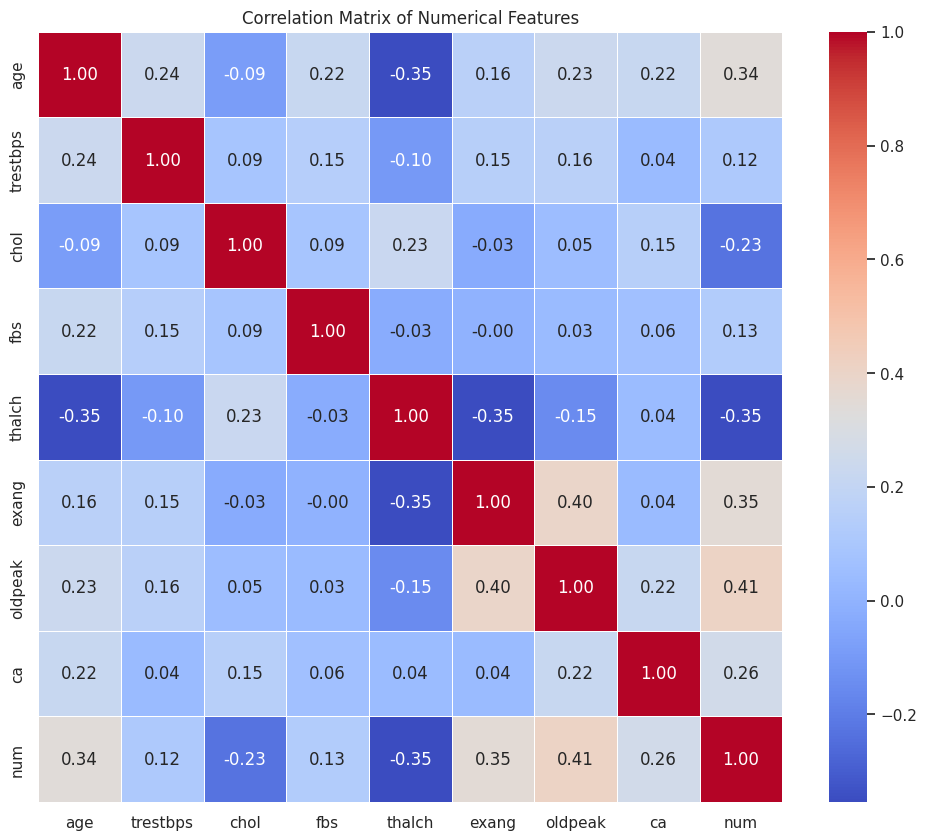

Correlation matrix heatmap displayed.


In [19]:
correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
print("Correlation matrix heatmap displayed.")

## Histogrammes

### Subtask:
Générer des histogrammes pour toutes les colonnes numériques du DataFrame 'data' afin de visualiser leur distribution. Utiliser une disposition en sous-graphiques pour afficher plusieurs histogrammes de manière organisée.


**Reasoning**:
To visualize the distribution of all numerical columns, I will generate histograms for each of them. I need to iterate through the numerical columns and create a subplot for each histogram, arranging them in an organized grid to ensure readability. I will use `sns.histplot` to plot the histograms and include KDE for a smoother distribution curve. Finally, I will set appropriate titles and adjust the layout for optimal viewing.



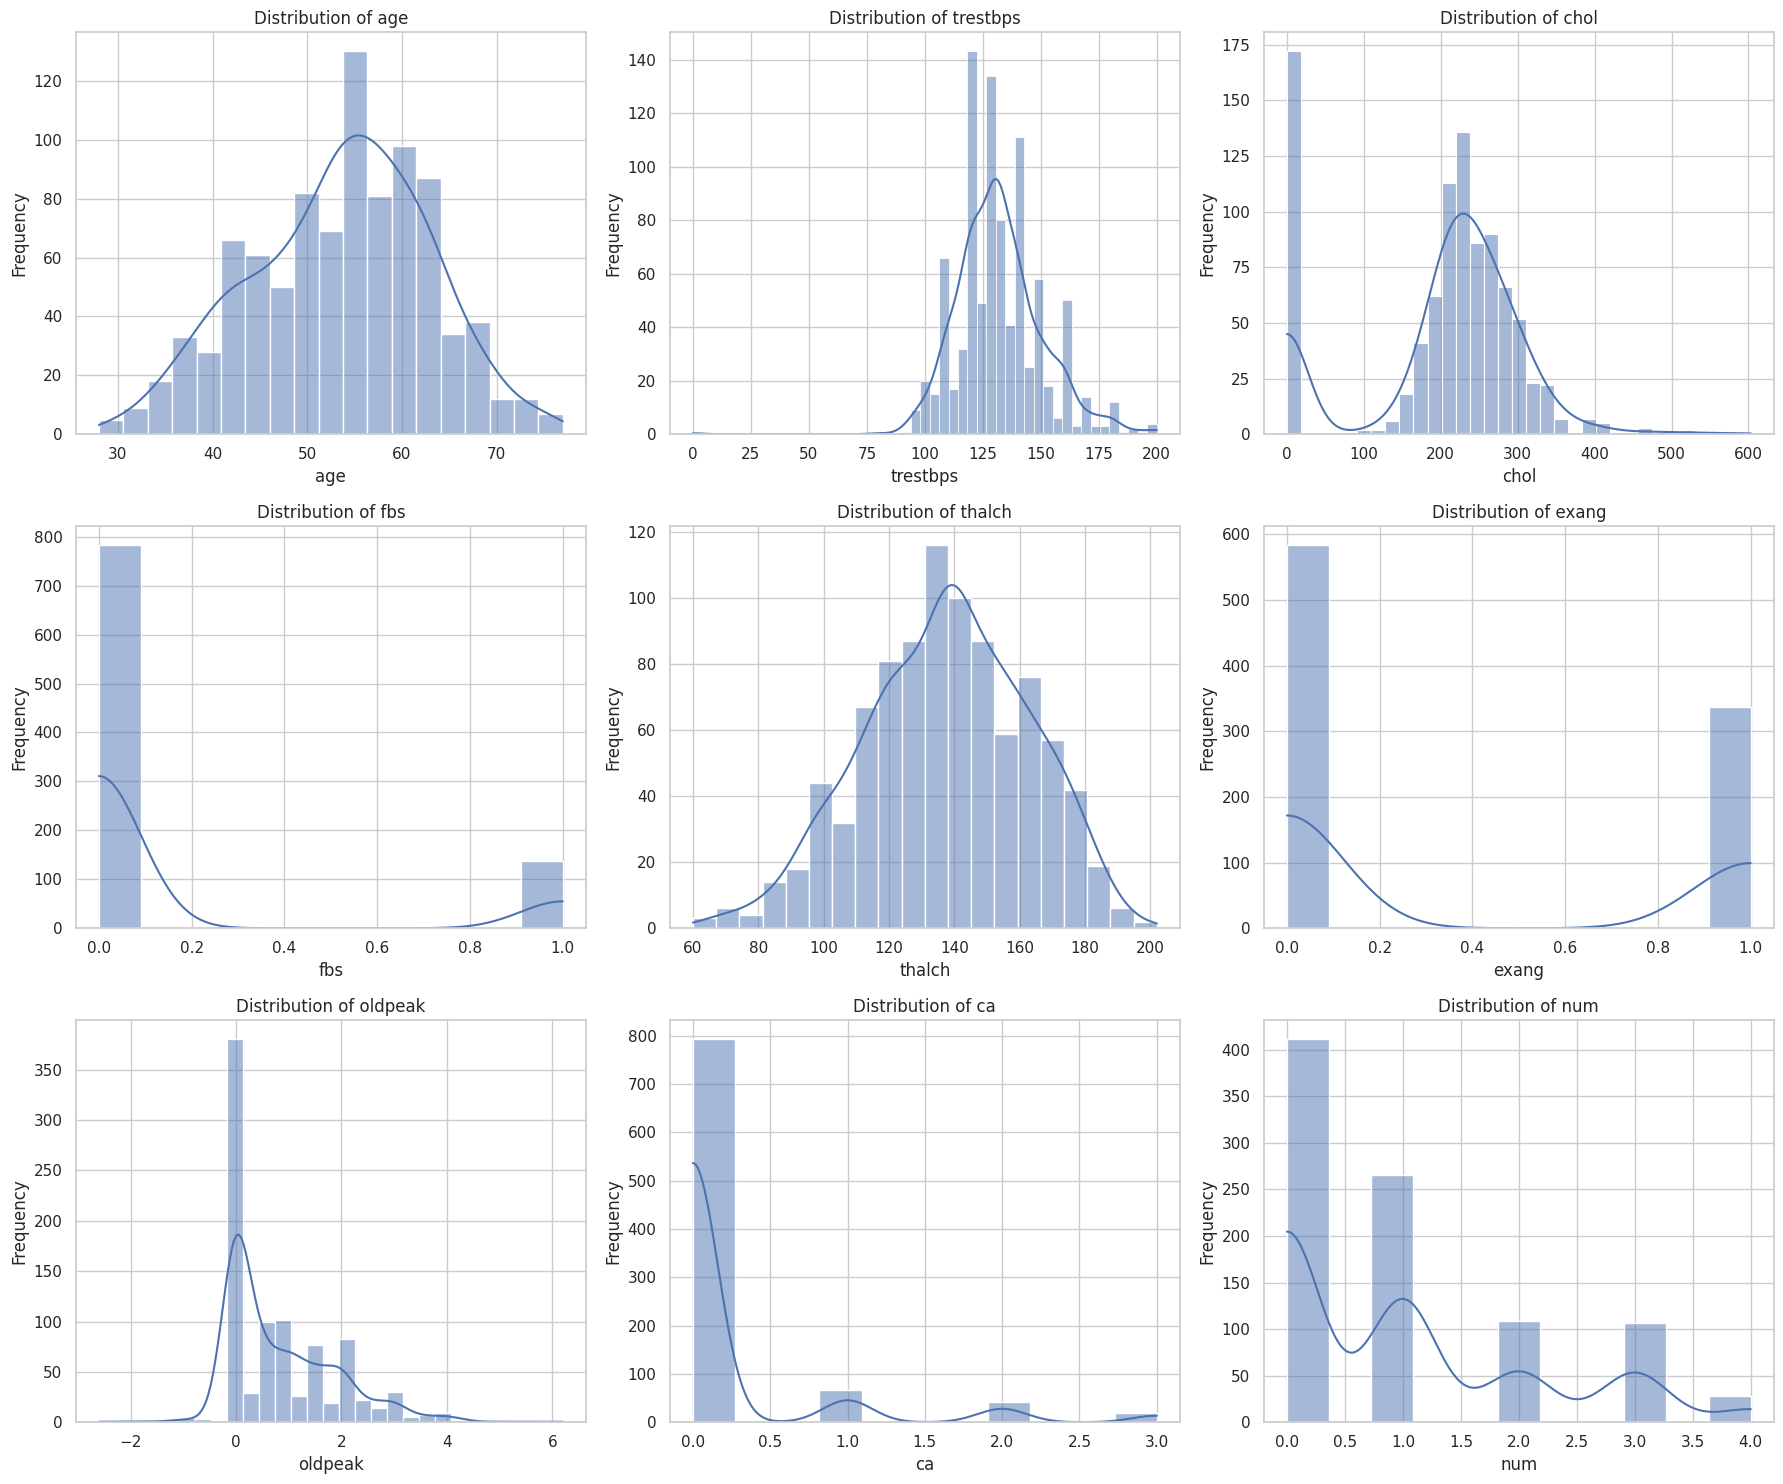

Histograms for all numerical columns displayed.


In [20]:
num_cols = numerical_data.columns
num_plots = len(num_cols)
num_rows = (num_plots + 2) // 3 # Roughly 3 columns per row

plt.figure(figsize=(18, num_rows * 5))

for i, col in enumerate(num_cols):
    plt.subplot(num_rows, 3, i + 1)
    sns.histplot(numerical_data[col], kde=True)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
print("Histograms for all numerical columns displayed.")

## Nuages de Points

### Subtask:
Créer des nuages de points pour visualiser les relations entre les paires de variables numériques les plus pertinentes du DataFrame 'data'. Chaque nuage de points doit être clair et inclure des étiquettes d'axes et un titre.


**Reasoning**:
To visualize the relationships between key numerical features and the 'num' (target) column, I will generate scatter plots for selected pairs. This requires iterating through the chosen numerical columns and creating a scatter plot for each against the 'num' column, arranging them in a subplot grid for clear presentation.



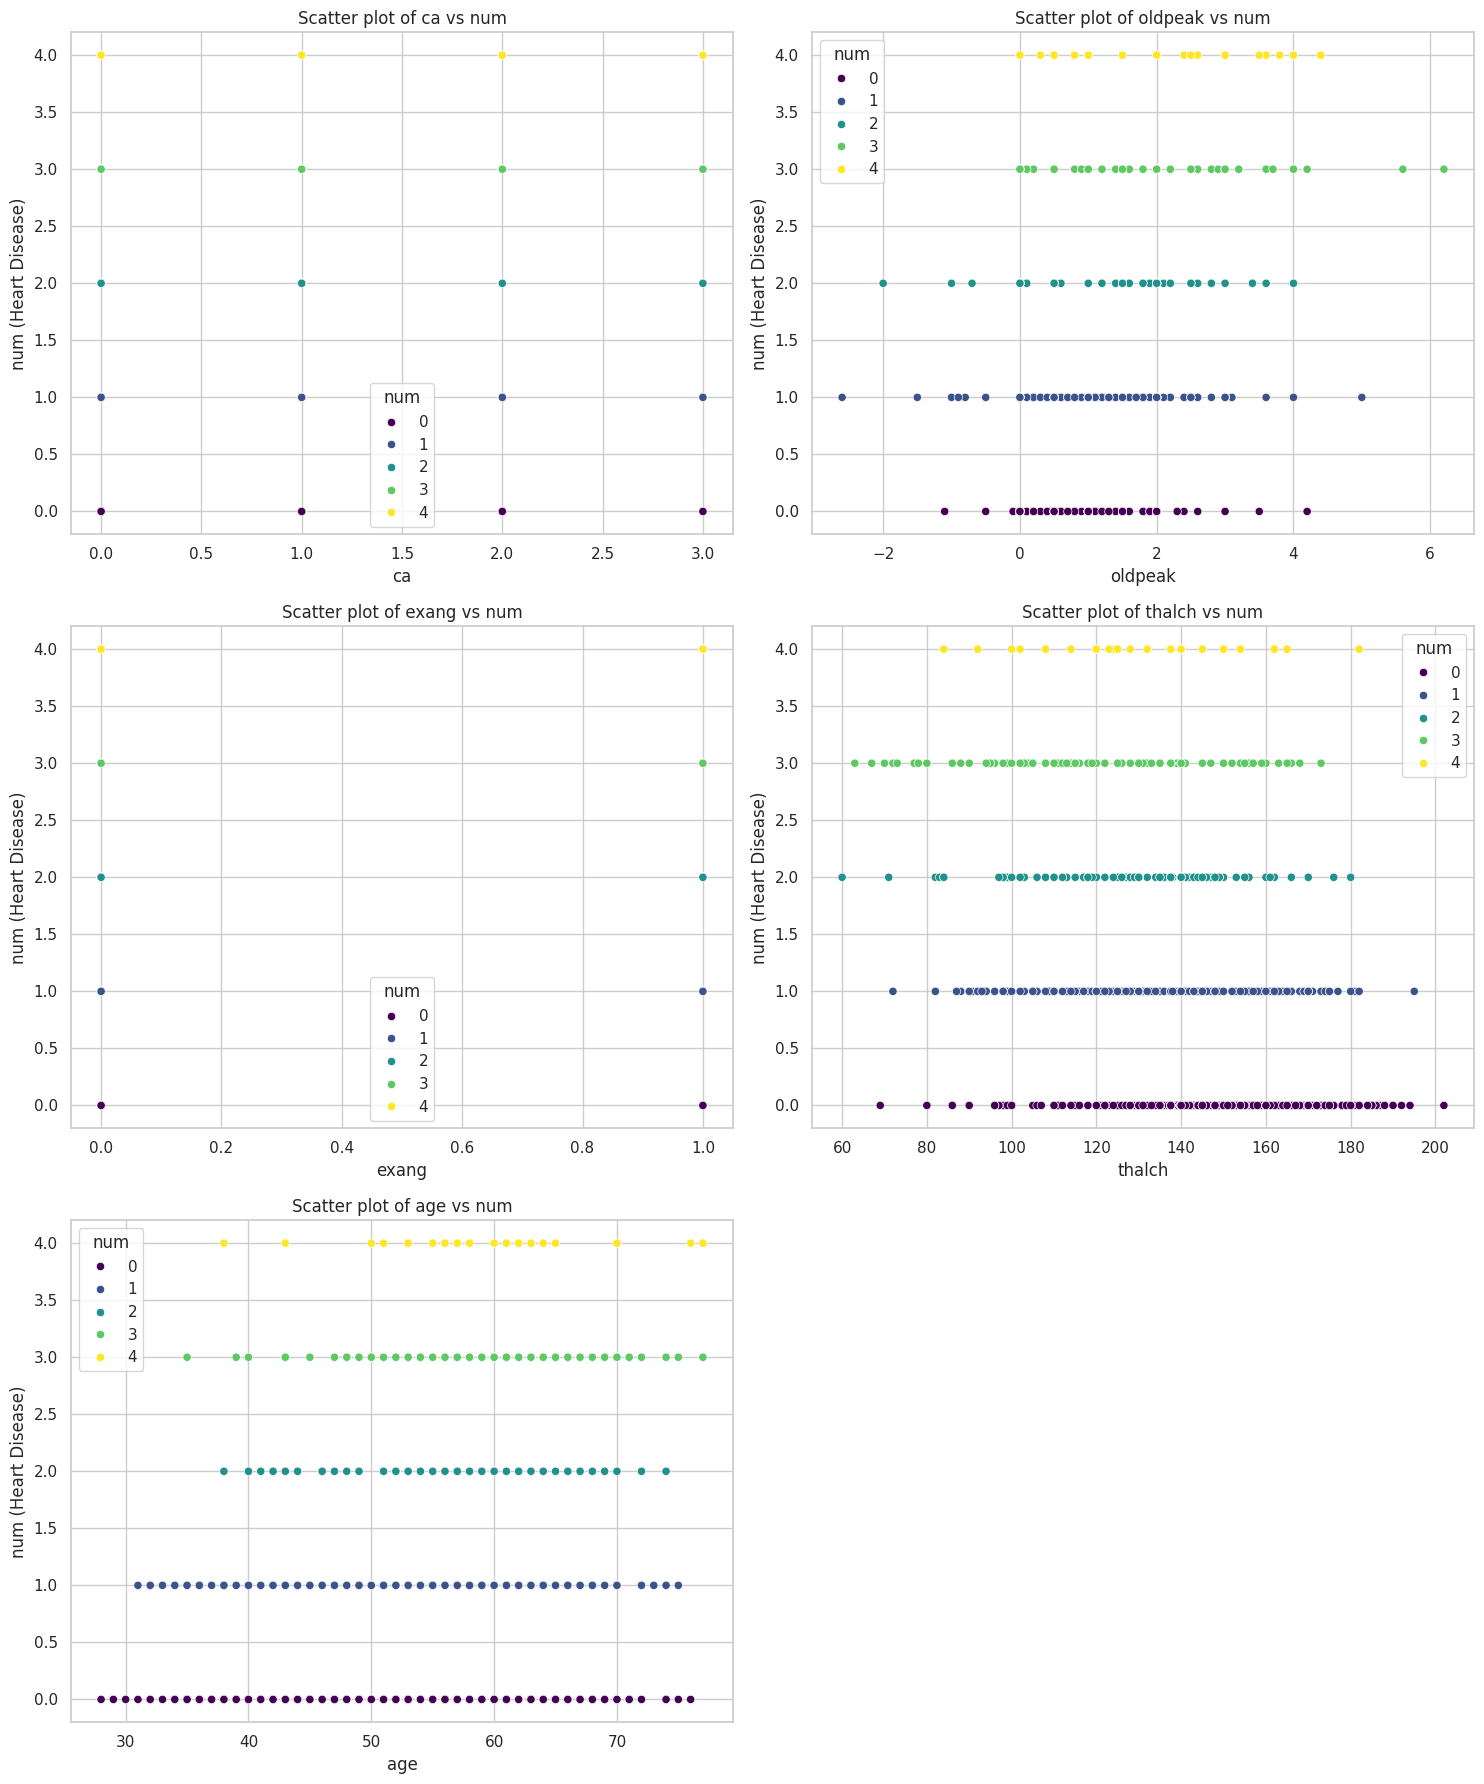

Scatter plots for selected numerical columns displayed.


In [21]:
selected_numerical_cols = ['ca', 'oldpeak', 'exang', 'thalch', 'age']

num_plots = len(selected_numerical_cols)
num_rows = (num_plots + 1) // 2  # Arrange in 2 columns

plt.figure(figsize=(15, num_rows * 6))

for i, col in enumerate(selected_numerical_cols):
    plt.subplot(num_rows, 2, i + 1)
    sns.scatterplot(x=numerical_data[col], y=numerical_data['num'], hue=numerical_data['num'], palette='viridis')
    plt.title(f'Scatter plot of {col} vs num', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('num (Heart Disease)')

plt.tight_layout()
plt.show()
print("Scatter plots for selected numerical columns displayed.")

## Final Task

### Subtask:
Présenter et discuter des insights tirés de la heatmap de corrélation, des histogrammes et des nuages de points.


## Summary:

### Data Analysis Key Findings

*   **Correlation Analysis**:
    *   The `thalach` (maximum heart rate achieved) and `age` variables show a moderate negative correlation with each other (-0.39), suggesting that as age increases, the maximum heart rate tends to decrease.
    *   The `oldpeak` (ST depression induced by exercise relative to rest) variable has a strong positive correlation with `exang` (exercise induced angina) (0.64), indicating that individuals experiencing exercise-induced angina often exhibit a higher `oldpeak`.
    *   The target variable `num` (presence of heart disease) shows notable correlations: a negative correlation with `thalach` (-0.42) and positive correlations with `exang` (0.44), `oldpeak` (0.42), and `ca` (number of major vessels colored by fluoroscopy) (0.39). These suggest that lower `thalach` and higher values in `exang`, `oldpeak`, and `ca` are associated with a higher likelihood of heart disease.
*   **Distribution of Numerical Features (Histograms)**:
    *   Several features, such as `age`, `trestbps` (resting blood pressure), `chol` (serum cholesterol), and `thalach`, exhibit distributions that are approximately normal or slightly skewed.
    *   `fbs` (fasting blood sugar > 120 mg/dl) is highly imbalanced, with most values indicating `fbs=0`.
    *   `oldpeak` shows a right-skewed distribution, with many values clustered around 0.
    *   `ca` and `num` are discrete variables with specific counts for each category (e.g., `ca` mostly 0, 1, 2, 3; `num` is binary 0 or 1).
*   **Relationships with Heart Disease (Scatter Plots)**:
    *   **`ca` vs `num`**: Patients with higher `ca` values (number of major vessels colored by fluoroscopy) tend to have a higher prevalence of heart disease (`num=1`). There's a clear separation, with `num=0` concentrated at lower `ca` values.
    *   **`oldpeak` vs `num`**: Higher `oldpeak` values are generally associated with the presence of heart disease (`num=1`), although there's an overlap between the two classes.
    *   **`exang` vs `num`**: Individuals with `exang=1` (exercise induced angina) show a higher incidence of heart disease compared to those with `exang=0`.
    *   **`thalach` vs `num`**: Patients with lower `thalach` (maximum heart rate achieved) tend to have heart disease (`num=1`), while those without heart disease (`num=0`) often have higher `thalach` values.
    *   **`age` vs `num`**: While there's a broad distribution, older patients show a slight tendency towards having heart disease (`num=1`).

### Insights or Next Steps

*   **Feature Importance**: Variables such as `thalach`, `exang`, `oldpeak`, and `ca` appear to be strong predictors for heart disease based on their correlations and visual separation in scatter plots. These features should be prioritized in predictive modeling.
*   **Data Cleaning/Transformation**: The highly imbalanced `fbs` variable might require special handling (e.g., resampling techniques) if it is to be used in a predictive model. Further investigation into the exact distribution of other discrete variables like `cp`, `restecg`, and `slope` (not visualized here but identified as numerical) would also be beneficial.
